# Topic:    
# <font color = green> The Evaluation Of Stock Performance Of Top 10 Largest US Banks For The Pre-Covid19, Covid19 and Post-Covid19 Period From January 2015 to November 2023.<a ></a>


## Description of Dataset : New York Stock Exchange (NYSE) Ticker names:


- Data Set : We got the stock information for the following top 10 largest US Banks with the tickers below as listed on NYSE by using the Yahoo Finance Python API.
 
## The Top 10 Largest US Banks in terms of total assets are:

## 1. JPMorgan Chase (JPM)
## 2. Bank of America (BAC)
## 3. Wells Fargo (WFC) 
## 4.  Citibank (C)
## 5. US Bancorp/US Bank (USB)
## 6. PNC Financial Services Group Inc. (PNC)
## 7. Goldman Sachs Group Inc. (GS)
## 8. Truist Financial Corp. (TFC) 
## 9. Capital One (COF)
## 10 Toronto-Dominion Bank, (TD)

### Source: US Federal Reserve Statistical Release(As of September 30,2023)

 ####  Every bank ticker name has 6 columns:
   - Open : This is the daily opening stock price 
   - Close :This is the daily closing stock price
   - High : This is the daily highest stock price
   - Low : This is the daily lowest stock price
   - Adj Close: This is daily stock adjusted closing price after market hours in relation to other stock attributes such as dividends,stock splits and new stock offerings.
   - Volume: This is the daily stock volume traded on the floor of NYSE.
   
 ### We will use only the Adj Close price to get the daily returns. 
 ##### The adjusted close price is most often used to estimate the value of stock because it is considered to be more technically accurate reflection or indicator of the stock value.

# 

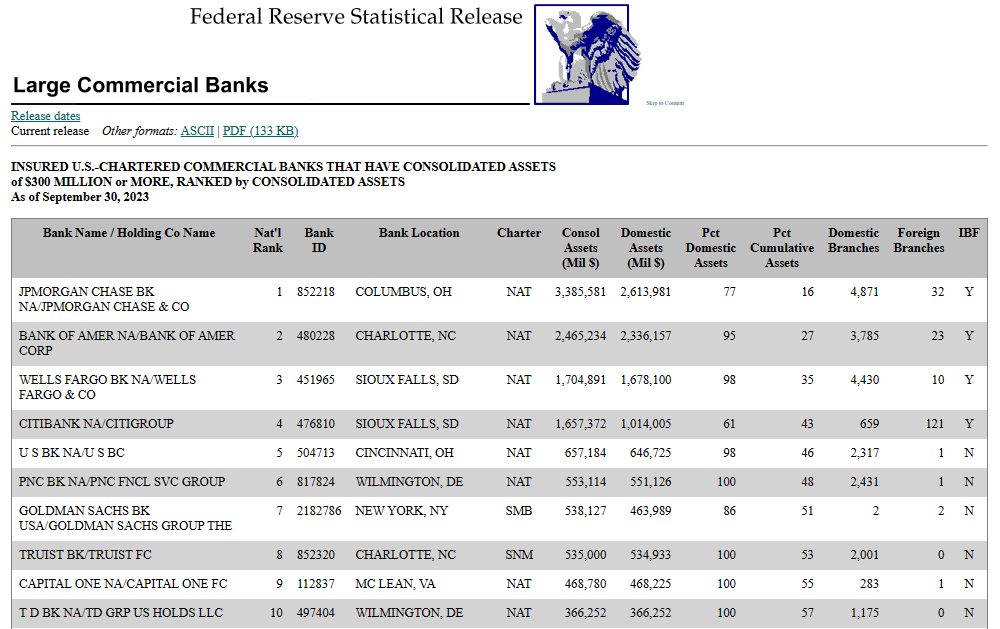
## Source: US Federal Reserve Statistical Release(As of September 30,2023)

# 

## Data Collection : The open-source Yahoo Finance Python API known as yfinance.

## Data Preparation: The downloaded data was divided into 3 periods below:
### - Pre-Covid19 : January 5,2015 - January 21,2020
### - Covid19 : January 22,2020 -   August 31,2022
### - Post- Covid19 : September 1,2022 - November 24,2023.

# Import Python Libraries

In [1]:
# Import Python Libraries: NumPy,Pandas,Series,DataFrame
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [2]:
# Import Libraries & modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px

import plotly.graph_objs as go 

# For Notebooks
init_notebook_mode(connected=True) 

# For offline use
cf.go_offline()

In [3]:
# Import Python Libraries: Yahoo Finance API,Datetime and Datareader- to be able to get up-to-date,
#read and handle the data correctly from Yahoo Finance
import pandas_datareader as pdr
import datetime
import yfinance as yf

# API Data Download From Yahoo Finance

In [4]:
# Download the bank stocks from Yahoo Finance API
data = yf.download(['JPM' ,'BAC','WFC','C','USB','PNC','GS','TFC','COF','TD'],start='2015-01-03',end='2023-11-26',group_by='tickers',rounding=True)




[*********************100%%**********************]  10 of 10 completed


In [5]:
# Use .to_csv to save the downloaded in csv to be uploaded in Google Cloud Platform
data.to_csv('ADTA5240 Final Project updated.csv')

In [6]:
# To check the first five rows to make sure that it is within the specified period
data.head(5)

JPM                                             WFC         \
             Open   High    Low  Close Adj Close    Volume   Open   High   
Date                                                                       
2015-01-05  62.06  62.28  60.23  60.55     47.33  20100600  54.14  54.36   
2015-01-06  60.64  60.75  58.35  58.98     46.11  29074100  53.35  53.47   
2015-01-07  59.89  59.89  58.67  59.07     46.18  23843200  52.63  52.64   
2015-01-08  59.97  60.90  59.97  60.39     47.21  16971100  53.00  53.59   
2015-01-09  60.72  60.79  59.29  59.34     46.39  15396200  53.54  53.59   

                          ...      GS                               USB  \
              Low  Close  ...     Low   Close Adj Close   Volume   Open   
Date                      ...                                             
2015-01-05  53.10  53.20  ...  187.48  188.34    158.33  3413200  44.55   
2015-01-06  51.85  52.09  ...  183.93  184.53    155.12  3429200  43.90   
2015-01-07  52.11  52.40  ...  185.77  187.28    157.44  1896800  43.60   
2015-01-08  52.96  53.56  ...  189.25  190.27    159.95  1962500  43.97   
2015-01-09  52.67  52.68  ...  186.96  187.35    157.50  1980700  43.88   

                                                     
             High    Low  Close Adj Close    Volume  
Date                                                 
2015-01-05  44.77  43.69  43.75     32.87   6568700  
2015-01-06  44.00  42.88  43.17     32.44   8523700  
2015-01-07  43.69  43.14  43.55     32.72   5073700  
2015-01-08  44.16  43.78  43.87     32.96  10417600  
2015-01-09  44.03  42.82  42.96     32.28   8095700  

[5 rows x 60 columns]

In [7]:
# We group the column with column header names to be able to do multi-level indexing based on the header names
data.columns.names = ['TickerName','StockDetails']

In [8]:
# Again we check the first five rows to make sure that it is within the specified period with the column header names
data.head(5)

TickerName      JPM                                             WFC         \
StockDetails   Open   High    Low  Close Adj Close    Volume   Open   High   
Date                                                                         
2015-01-05    62.06  62.28  60.23  60.55     47.33  20100600  54.14  54.36   
2015-01-06    60.64  60.75  58.35  58.98     46.11  29074100  53.35  53.47   
2015-01-07    59.89  59.89  58.67  59.07     46.18  23843200  52.63  52.64   
2015-01-08    59.97  60.90  59.97  60.39     47.21  16971100  53.00  53.59   
2015-01-09    60.72  60.79  59.29  59.34     46.39  15396200  53.54  53.59   

TickerName                  ...      GS                               USB  \
StockDetails    Low  Close  ...     Low   Close Adj Close   Volume   Open   
Date                        ...                                             
2015-01-05    53.10  53.20  ...  187.48  188.34    158.33  3413200  44.55   
2015-01-06    51.85  52.09  ...  183.93  184.53    155.12  3429200  43.90   
2015-01-07    52.11  52.40  ...  185.77  187.28    157.44  1896800  43.60   
2015-01-08    52.96  53.56  ...  189.25  190.27    159.95  1962500  43.97   
2015-01-09    52.67  52.68  ...  186.96  187.35    157.50  1980700  43.88   

TickerName                                             
StockDetails   High    Low  Close Adj Close    Volume  
Date                                                   
2015-01-05    44.77  43.69  43.75     32.87   6568700  
2015-01-06    44.00  42.88  43.17     32.44   8523700  
2015-01-07    43.69  43.14  43.55     32.72   5073700  
2015-01-08    44.16  43.78  43.87     32.96  10417600  
2015-01-09    44.03  42.82  42.96     32.28   8095700  

[5 rows x 60 columns]

In [9]:
# We check the last five rows to make sure that it is within the specified period with the column header names
data.tail(5)

TickerName       JPM                                               WFC         \
StockDetails    Open    High     Low   Close Adj Close   Volume   Open   High   
Date                                                                            
2023-11-17    152.20  152.86  151.54  152.82    152.82  7812400  42.83  42.99   
2023-11-20    152.08  153.75  151.92  153.29    153.29  7019000  42.86  42.95   
2023-11-21    153.20  153.63  152.57  152.97    152.97  7083500  42.64  42.73   
2023-11-22    153.41  153.88  152.90  153.33    153.33  5174500  42.66  42.83   
2023-11-24    153.59  154.44  153.28  153.54    153.54  3496900  42.80  43.11   

TickerName                  ...      GS                               USB  \
StockDetails    Low  Close  ...     Low   Close Adj Close   Volume   Open   
Date                        ...                                             
2023-11-17    42.44  42.96  ...  338.12  339.19    336.43  1465200  37.66   
2023-11-20    42.51  42.79  ...  337.50  339.45    336.69  3146000  37.53   
2023-11-21    42.15  42.60  ...  334.55  334.97    332.24  1900900  37.21   
2023-11-22    42.40  42.78  ...  335.37  338.64    335.88  1235200  37.27   
2023-11-24    42.73  42.92  ...  337.64  339.15    336.39   460100  36.80   

TickerName                                            
StockDetails   High    Low  Close Adj Close   Volume  
Date                                                  
2023-11-17    37.79  37.36  37.64     37.64  8915900  
2023-11-20    37.85  37.23  37.63     37.63  6272100  
2023-11-21    37.57  36.99  37.01     37.01  6051200  
2023-11-22    37.38  36.72  36.83     36.83  6742500  
2023-11-24    37.37  36.67  37.20     37.20  2796800  

[5 rows x 60 columns]

# Preprocess the Dataset: Clean Data: Find & Mark Missing Values

### We will clean the data above by removing the irrelevant columns and we only need the dates and the Adj Close Price for the returns

In [10]:
# We removed irrelevant columns by using .drop() function and the 60 columns above will be reduced to only 10 columns
data.drop([(  'C',      'Open'),(  'C',      'High'),(  'C',       'Low'),(  'C', 'Close'),(  'C',    'Volume'),
            ( 'TD',      'Open'),( 'TD',      'High'),( 'TD',       'Low'),( 'TD', 'Close'),( 'TD',    'Volume'),
            ('WFC',      'Open'),('WFC',      'High'),('WFC',       'Low'),('WFC', 'Close'),('WFC',    'Volume'),
            ('COF',      'Open'),('COF',      'High'),('COF',       'Low'),('COF', 'Close'),('COF',    'Volume'),
            ( 'GS',      'Open'),( 'GS',      'High'),( 'GS',       'Low'),( 'GS', 'Close'),( 'GS',    'Volume'),
            ('USB',      'Open'),('USB',      'High'),('USB',       'Low'),('USB', 'Close'),('USB',    'Volume'),
            ('TFC',      'Open'),('TFC',      'High'),('TFC',       'Low'),('TFC', 'Close'),('TFC',    'Volume'),
            ('BAC',      'Open'),('BAC',      'High'),('BAC',       'Low'),('BAC', 'Close'),('BAC',    'Volume'),
            ('PNC',      'Open'),('PNC',      'High'),('PNC',       'Low'),('PNC', 'Close'),('PNC',    'Volume'),
            ('JPM',      'Open'),('JPM',      'High'),('JPM',       'Low'),('JPM', 'Close'),('JPM',    'Volume')],axis=1,inplace=True)

In [11]:
# We check to see the reduced data with the needed columns for our analysis
data

TickerName,JPM,WFC,TD,COF,TFC,BAC,C,PNC,GS,USB
StockDetails,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,
2015-01-05,47.33,40.96,32.31,67.96,26.95,14.47,41.72,67.19,158.33,32.87
2015-01-06,46.11,40.11,31.64,66.69,26.43,14.04,40.25,65.45,155.12,32.44
2015-01-07,46.18,40.35,31.53,67.45,26.78,14.10,40.63,66.20,157.44,32.72
2015-01-08,47.21,41.24,31.69,68.11,27.23,14.39,41.24,67.48,159.95,32.96
2015-01-09,46.39,40.56,31.21,66.93,26.52,14.14,40.32,66.22,157.50,32.28
...,...,...,...,...,...,...,...,...,...,...
2023-11-17,152.82,42.96,61.82,107.68,31.97,29.74,45.36,130.26,336.43,37.64
2023-11-20,153.29,42.79,62.01,107.15,32.04,29.77,45.26,130.34,336.69,37.63


In [12]:
# Check for missing value using isnull() function.
data.isnull().sum()

TickerName  StockDetails
JPM         Adj Close       0
WFC         Adj Close       0
TD          Adj Close       0
COF         Adj Close       0
TFC         Adj Close       0
BAC         Adj Close       0
C           Adj Close       0
PNC         Adj Close       0
GS          Adj Close       0
USB         Adj Close       0
dtype: int64

## Perform the Exploratory Data Analysis(EDA)

In [15]:
#The information about the data including the dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2239 entries, 2015-01-05 to 2023-11-24
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (JPM, Adj Close)  2239 non-null   float64
 1   (WFC, Adj Close)  2239 non-null   float64
 2   (TD, Adj Close)   2239 non-null   float64
 3   (COF, Adj Close)  2239 non-null   float64
 4   (TFC, Adj Close)  2239 non-null   float64
 5   (BAC, Adj Close)  2239 non-null   float64
 6   (C, Adj Close)    2239 non-null   float64
 7   (PNC, Adj Close)  2239 non-null   float64
 8   (GS, Adj Close)   2239 non-null   float64
 9   (USB, Adj Close)  2239 non-null   float64
dtypes: float64(10)
memory usage: 192.4 KB


In [16]:
#The summary statistics of the numeric variables / attributes in the data set
data.describe()

TickerName,JPM,WFC,TD,COF,TFC,BAC,C,PNC,GS,USB
StockDetails,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,97.218620,41.366816,46.972510,88.763010,37.881572,25.248272,50.050706,115.969205,229.628924,40.438160
std,33.384053,6.735771,12.759595,26.377127,8.605203,8.574399,9.517144,34.696652,74.788980,7.047584
min,42.510000,19.670000,24.910000,39.410000,21.690000,9.400000,27.890000,61.350000,119.830000,24.680000
25%,71.905000,39.545000,36.650000,69.595000,29.670000,19.750000,42.660000,92.470000,174.600000,33.460000
50%,94.460000,42.730000,45.780000,83.030000,38.220000,25.670000,48.660000,113.640000,201.280000,41.230000
75%,125.585000,45.280000,59.180000,99.705000,43.520000,30.555000,58.145000,136.595000,308.120000,44.550000
max,161.700000,56.210000,78.720000,169.510000,60.810000,46.800000,72.320000,209.140000,398.170000,58.160000


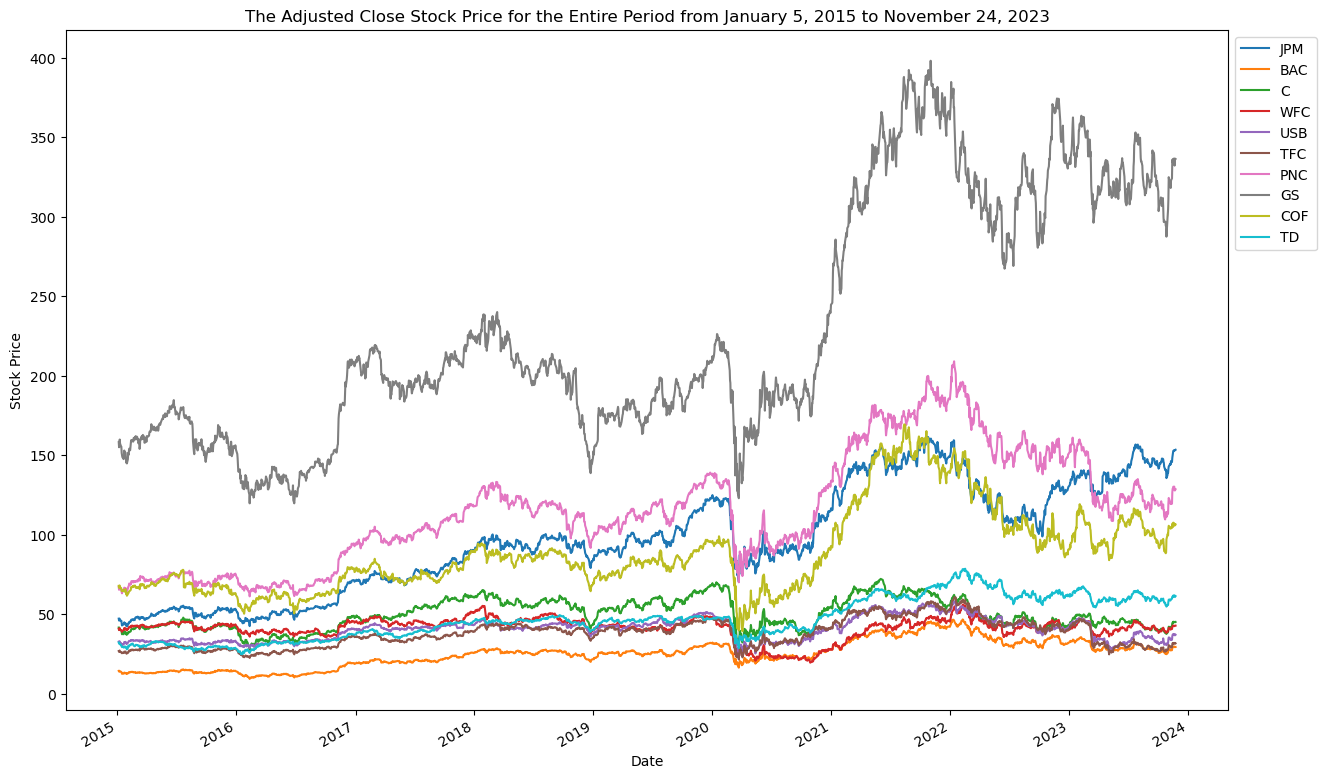

In [20]:
for ticker in tickername:
    data[ticker]['Adj Close'].plot(label=ticker,figsize=(15,10))
plt.ylabel('Stock Price')
plt.title("The Adjusted Close Stock Price for the Entire Period from January 5, 2015 to November 24, 2023")
plt.legend(bbox_to_anchor=(1,1))

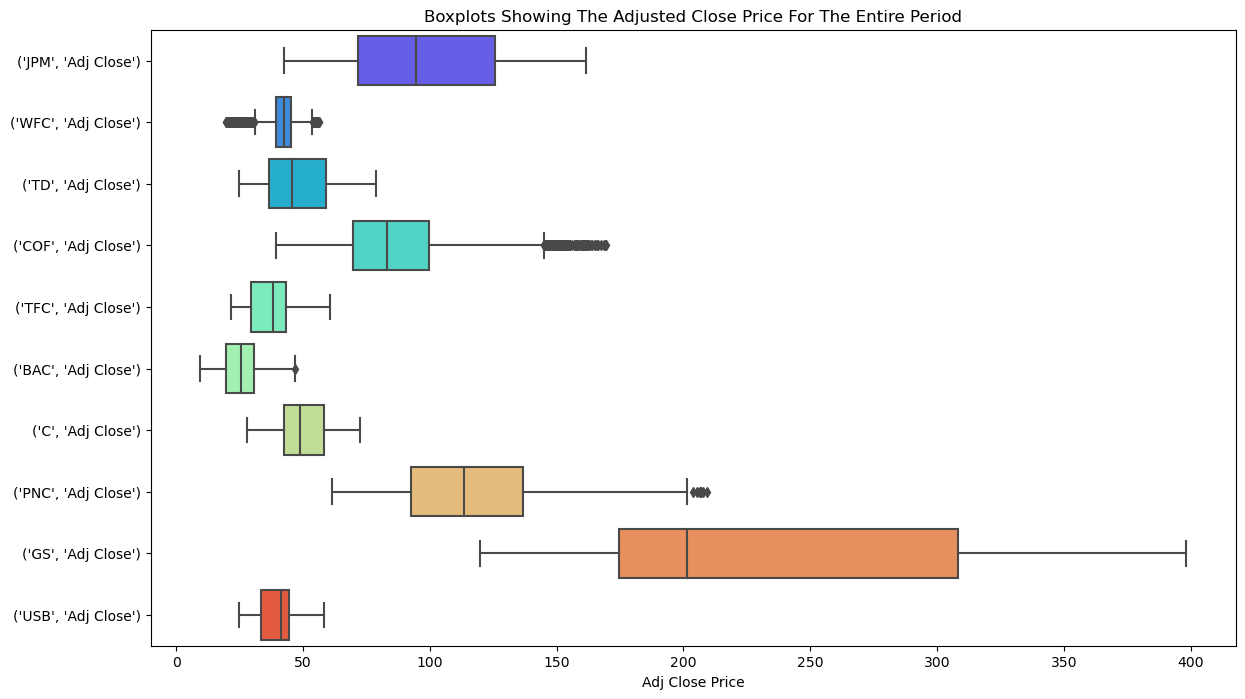

In [21]:
"""
It is not a good idea to remove outliers in stock analysis because in most cases it indicates huge gains or loss based on
market dynamics such as release of monthly or quarterly economic data,outliers in stock analysis indicates market volatility.
"""
fig,ax =plt.subplots(figsize=(14,8))
sns.boxplot(data=data,palette='rainbow',ax=ax,orient='h' )
plt.xlabel('Adj Close Price')
plt.title("Boxplots Showing The Adjusted Close Price For The Entire Period")
plt.show()

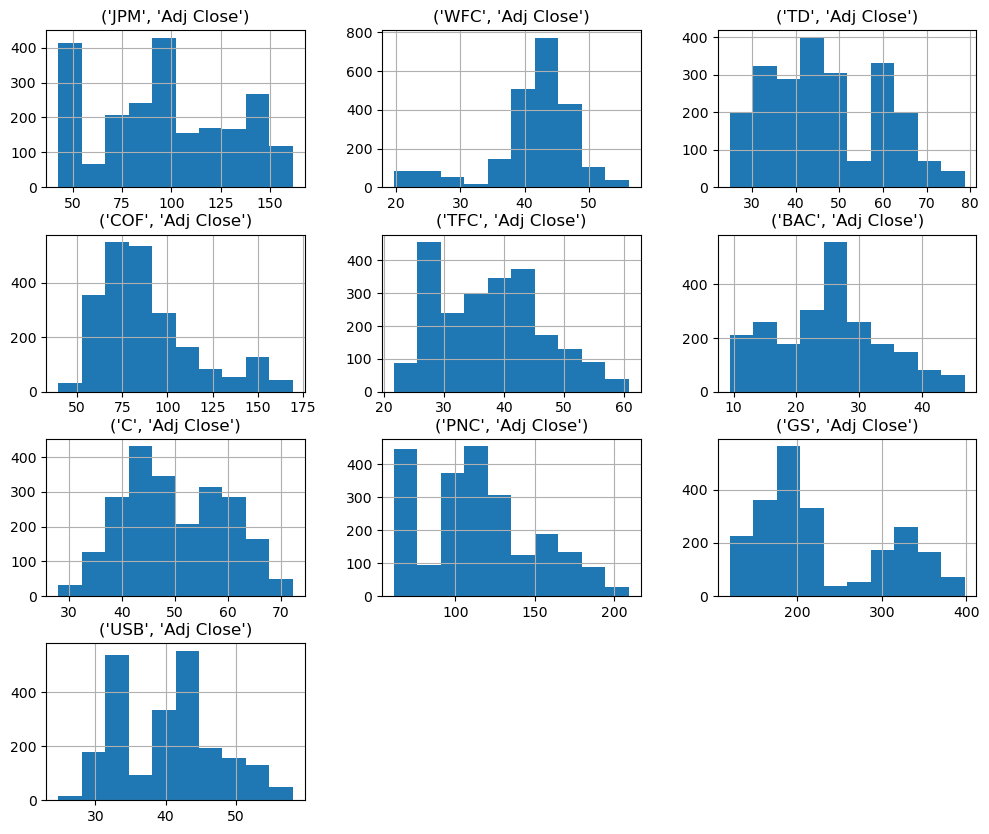

In [22]:
#plot histogram of each numeric variable / attribute in the data set
data.hist(figsize=(12, 10))
pyplot.show()

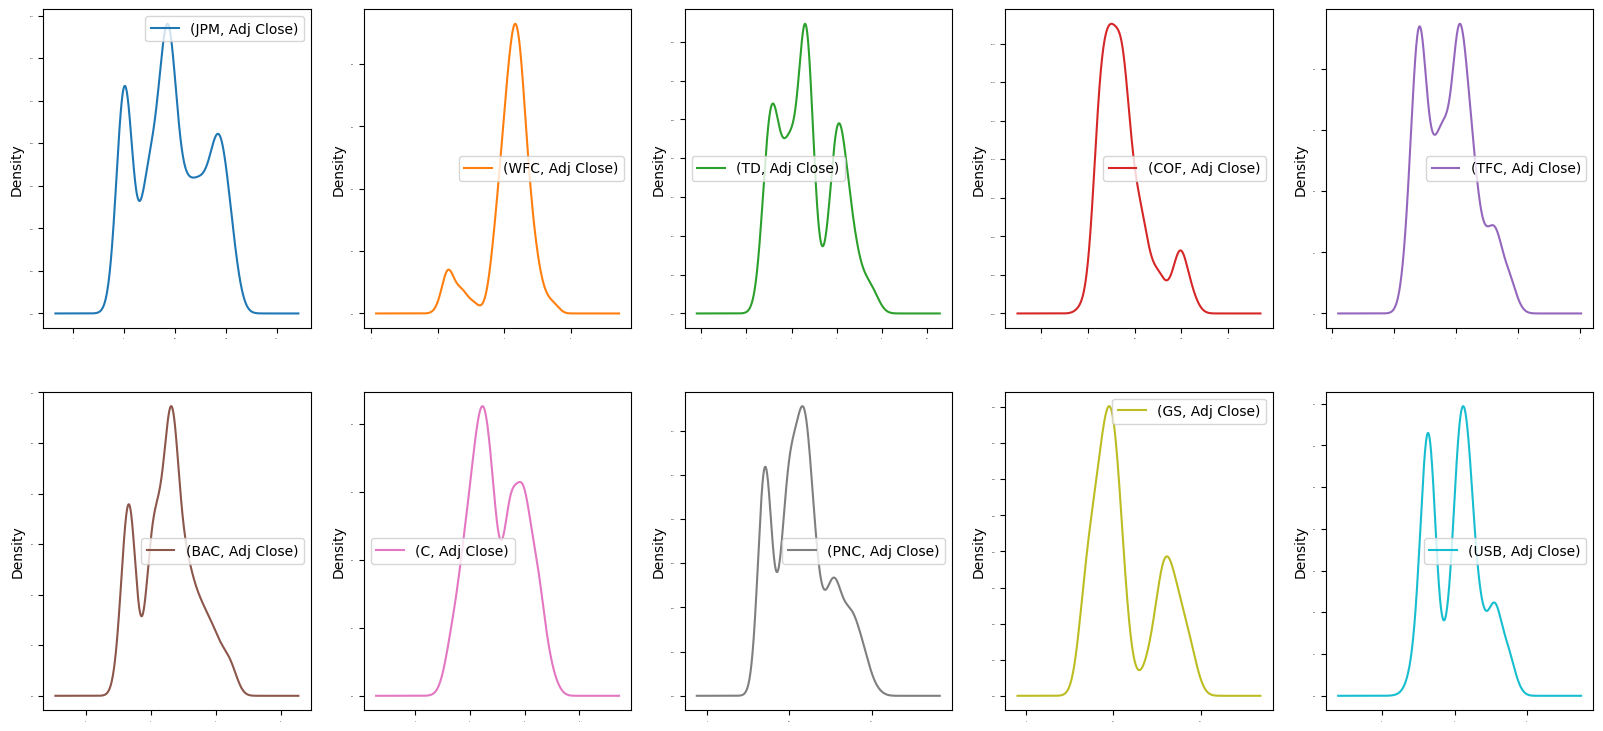

In [23]:
# Density plots of each numeric variable / attribute in the data set
data.plot(kind='density', subplots=True, sharex=False, legend=True, fontsize=1,layout=(5, 5),
figsize=(20, 24))
pyplot.show()

## The adjusted closing price for the pre-covid period January 5, 2015 to January 21, 2020

In [25]:
# The dataset for pre-Covid data from January 5,2015 to January 21,2020
preCovid= data[:1270]
preCovid

TickerName,JPM,WFC,TD,COF,TFC,BAC,C,PNC,GS,USB
StockDetails,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,
2015-01-05,47.33,40.96,32.31,67.96,26.95,14.47,41.72,67.19,158.33,32.87
2015-01-06,46.11,40.11,31.64,66.69,26.43,14.04,40.25,65.45,155.12,32.44
2015-01-07,46.18,40.35,31.53,67.45,26.78,14.10,40.63,66.20,157.44,32.72
2015-01-08,47.21,41.24,31.69,68.11,27.23,14.39,41.24,67.48,159.95,32.96
2015-01-09,46.39,40.56,31.21,66.93,26.52,14.14,40.32,66.22,157.50,32.28
...,...,...,...,...,...,...,...,...,...,...
2020-01-14,123.78,44.30,47.37,95.24,47.19,31.98,70.20,138.06,222.63,48.27
2020-01-15,121.93,43.42,47.73,95.04,46.16,31.40,69.63,133.05,222.22,46.89


# The adjusted closing price for the covid period January 22,2020 to August 31, 2022

In [26]:
Covid = data[1270:1929]
Covid

TickerName,JPM,WFC,TD,COF,TFC,BAC,C,PNC,GS,USB
StockDetails,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,
2020-01-22,121.89,43.63,47.92,99.14,47.17,31.11,68.65,132.47,223.89,46.86
2020-01-23,121.77,43.33,47.99,98.46,47.19,30.90,68.40,132.86,222.56,46.81
2020-01-24,118.74,42.74,47.96,96.86,46.45,30.37,67.21,130.83,219.24,45.92
2020-01-27,117.74,42.32,47.63,93.94,45.78,29.75,65.75,129.22,215.81,45.67
2020-01-28,119.88,42.56,47.90,94.76,46.02,30.10,66.20,130.23,219.84,45.94
...,...,...,...,...,...,...,...,...,...,...
2022-08-25,114.10,43.73,62.92,110.43,46.04,33.66,49.19,159.64,331.16,44.71
2022-08-26,110.36,42.36,62.91,106.70,44.70,32.60,47.04,153.30,321.51,43.52


# The adjusted closing price for the post-covid period Sept.1 2022 to Nov.24 2023

In [27]:
postCovid = data[1929:]
postCovid

TickerName,JPM,WFC,TD,COF,TFC,BAC,C,PNC,GS,USB
StockDetails,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,,,,,,
2022-09-01,110.21,42.10,60.72,101.83,43.48,32.27,46.06,149.76,321.15,42.94
2022-09-02,109.44,41.79,61.47,101.26,43.13,32.23,46.15,148.63,319.20,42.64
2022-09-06,109.47,41.31,60.43,99.27,42.69,31.88,45.56,147.80,314.40,42.43
2022-09-07,111.55,42.24,61.33,101.91,43.69,32.37,45.95,150.86,318.32,42.98
2022-09-08,114.15,43.58,62.20,103.41,44.57,33.41,47.15,153.92,322.96,44.05
...,...,...,...,...,...,...,...,...,...,...
2023-11-17,152.82,42.96,61.82,107.68,31.97,29.74,45.36,130.26,336.43,37.64
2023-11-20,153.29,42.79,62.01,107.15,32.04,29.77,45.26,130.34,336.69,37.63


## The Stock Returns for The Top 10 Banks for The Entire Period

In [30]:
# We calculate the stock_returns = data.pct_change() for the entire period and rounded to 4 decimal places
stock_returns = pd.DataFrame()

for ticker in tickername:
    stock_returns[ticker +  'Return'] = data[ticker]['Adj Close'].pct_change()
    stock_returns = round(stock_returns,4) 

In [31]:
# We used the .to_csv to save the file in csv format
stock_returns.to_csv('Returns.csv')

## The returns for the pre-covid period Jan.5 2015 to Jan.21 2020

In [32]:
# We seperate the returns for the pre-Covid period from the entire period and replace the first row of the returns calculation with 0.
PreCovidReturns= stock_returns[:1270].replace(np.NaN,0)
PreCovidReturns

,JPMReturn,BACReturn,CReturn,WFCReturn,USBReturn,TFCReturn,PNCReturn,GSReturn,COFReturn,TDReturn
Date,,,,,,,,,,
2015-01-05,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2015-01-06,-0.0258,-0.0297,-0.0352,-0.0208,-0.0131,-0.0193,-0.0259,-0.0203,-0.0187,-0.0207
2015-01-07,0.0015,0.0043,0.0094,0.0060,0.0086,0.0132,0.0115,0.0150,0.0114,-0.0035
2015-01-08,0.0223,0.0206,0.0150,0.0221,0.0073,0.0168,0.0193,0.0159,0.0098,0.0051
2015-01-09,-0.0174,-0.0174,-0.0223,-0.0165,-0.0206,-0.0261,-0.0187,-0.0153,-0.0173,-0.0151
...,...,...,...,...,...,...,...,...,...,...
2020-01-14,0.0117,0.0072,0.0156,-0.0538,-0.0021,0.0025,0.0028,0.0018,0.0063,-0.0046
2020-01-15,-0.0149,-0.0181,-0.0081,-0.0199,-0.0286,-0.0218,-0.0363,-0.0018,-0.0021,0.0076
2020-01-16,0.0039,0.0013,-0.0030,0.0191,0.0041,0.0132,-0.0020,0.0184,0.0056,0.0090


## The returns for the covid period Jan.22 2020 to Aug.31 2022

In [33]:
# We seperate the returns for the Covid period from the entire period
CovidReturns = stock_returns[1270:1929]
CovidReturns

,JPMReturn,BACReturn,CReturn,WFCReturn,USBReturn,TFCReturn,PNCReturn,GSReturn,COFReturn,TDReturn
Date,,,,,,,,,,
2020-01-22,-0.0011,0.0029,0.0025,-0.0077,0.0095,0.0011,0.0040,0.0055,0.0447,-0.0021
2020-01-23,-0.0010,-0.0068,-0.0036,-0.0069,-0.0011,0.0004,0.0029,-0.0059,-0.0069,0.0015
2020-01-24,-0.0249,-0.0172,-0.0174,-0.0136,-0.0190,-0.0157,-0.0153,-0.0149,-0.0163,-0.0006
2020-01-27,-0.0084,-0.0204,-0.0217,-0.0098,-0.0054,-0.0144,-0.0123,-0.0156,-0.0301,-0.0069
2020-01-28,0.0182,0.0118,0.0068,0.0057,0.0059,0.0052,0.0078,0.0187,0.0087,0.0057
...,...,...,...,...,...,...,...,...,...,...
2022-08-25,0.0238,0.0178,0.0205,0.0167,0.0120,0.0105,0.0090,0.0133,0.0299,0.0116
2022-08-26,-0.0328,-0.0315,-0.0437,-0.0313,-0.0266,-0.0291,-0.0397,-0.0291,-0.0338,-0.0002
2022-08-29,-0.0024,-0.0040,-0.0083,-0.0012,-0.0083,-0.0051,-0.0128,-0.0074,-0.0239,-0.0060


## The returns for the post-covid period Sept.1 2022 to Nov.24 2023

In [34]:
# We seperate the returns for the post-Covid period from the entire period
PostCovidReturns = stock_returns[1929:]
PostCovidReturns

,JPMReturn,BACReturn,CReturn,WFCReturn,USBReturn,TFCReturn,PNCReturn,GSReturn,COFReturn,TDReturn
Date,,,,,,,,,,
2022-09-01,0.0069,0.0025,-0.0013,-0.0002,0.0056,0.0007,0.0028,0.0025,-0.0095,-0.0010
2022-09-02,-0.0070,-0.0012,0.0020,-0.0074,-0.0070,-0.0080,-0.0075,-0.0061,-0.0056,0.0124
2022-09-06,0.0003,-0.0109,-0.0128,-0.0115,-0.0049,-0.0102,-0.0056,-0.0150,-0.0197,-0.0169
2022-09-07,0.0190,0.0154,0.0086,0.0225,0.0130,0.0234,0.0207,0.0125,0.0266,0.0149
2022-09-08,0.0233,0.0321,0.0261,0.0317,0.0249,0.0201,0.0203,0.0146,0.0147,0.0142
...,...,...,...,...,...,...,...,...,...,...
2023-11-17,0.0090,0.0147,0.0154,0.0101,0.0086,0.0165,0.0071,0.0075,0.0254,0.0151
2023-11-20,0.0031,0.0010,-0.0022,-0.0040,-0.0003,0.0022,0.0006,0.0008,-0.0049,0.0031
2023-11-21,-0.0021,-0.0114,-0.0038,-0.0044,-0.0165,-0.0144,-0.0182,-0.0132,-0.0128,-0.0084


# The correlation of all the stock returns for the entire period

In [35]:
#All the stock returns are postively correlated and have very strong to strong correlation.
#The most correlated stocks are JPMReturn and BACReturn of 0.91 followed by BACReturn and CReturn of 0.88
stock_returns.corr().round(2)

,JPMReturn,BACReturn,CReturn,WFCReturn,USBReturn,TFCReturn,PNCReturn,GSReturn,COFReturn,TDReturn
JPMReturn,1.00,0.91,0.87,0.82,0.82,0.80,0.85,0.83,0.77,0.72
BACReturn,0.91,1.00,0.88,0.84,0.83,0.83,0.86,0.83,0.78,0.71
CReturn,0.87,0.88,1.00,0.81,0.80,0.80,0.82,0.83,0.78,0.72
WFCReturn,0.82,0.84,0.81,1.00,0.81,0.80,0.81,0.76,0.74,0.68
USBReturn,0.82,0.83,0.80,0.81,1.00,0.87,0.86,0.73,0.76,0.69
TFCReturn,0.80,0.83,0.80,0.80,0.87,1.00,0.87,0.73,0.77,0.67
PNCReturn,0.85,0.86,0.82,0.81,0.86,0.87,1.00,0.77,0.78,0.69
GSReturn,0.83,0.83,0.83,0.76,0.73,0.73,0.77,1.00,0.74,0.67
COFReturn,0.77,0.78,0.78,0.74,0.76,0.77,0.78,0.74,1.00,0.66
TDReturn,0.72,0.71,0.72,0.68,0.69,0.67,0.69,0.67,0.66,1.00


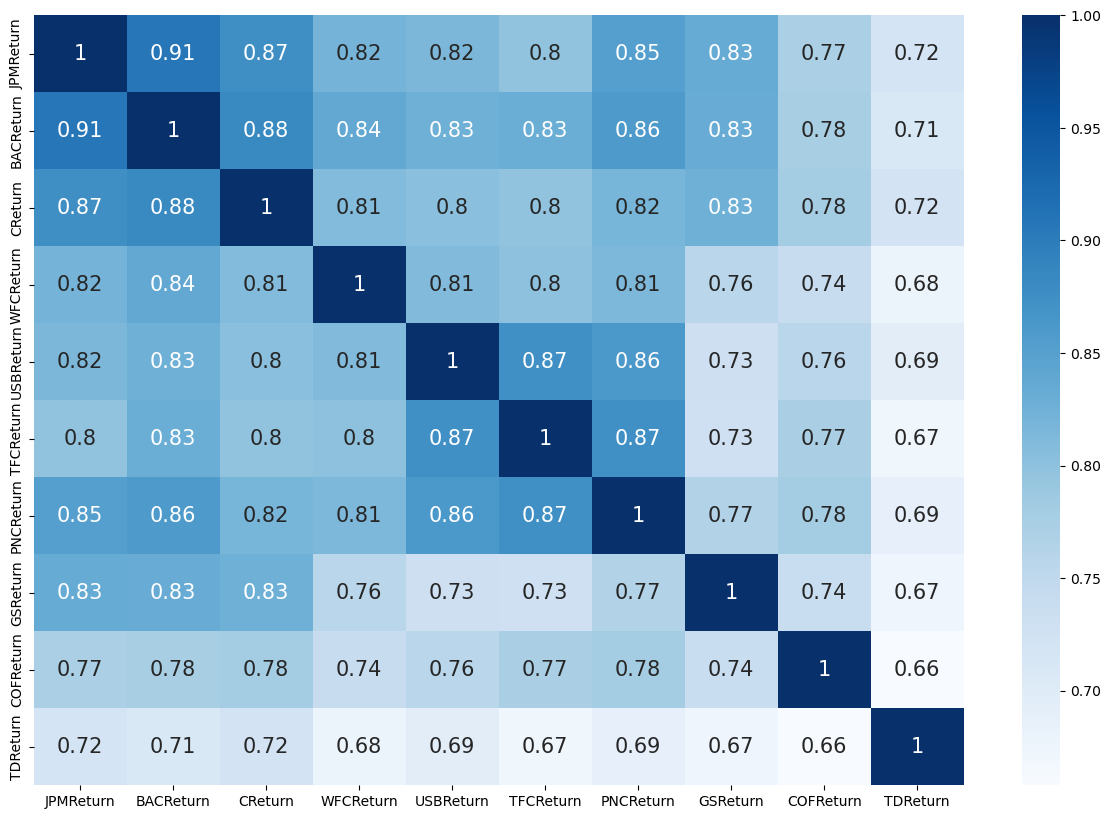

In [36]:
"""
Data visualization of the correlation of returns
The very strong to strong correlation between these returns could be a result of the equity instruments of these banks 
tend to move in the same direction all together and secondly the very strong correlation between JPMReturn and BACReturn could
be as a result of belonging to the same institutional holders known as JP Morgan Investment Management.
"""
plt.figure(figsize=(15,10))
sns.heatmap(stock_returns.corr(),annot=True,cmap="Blues",annot_kws={"fontsize":15})
plt.show()

# The Descriptive Statistics Of The Stock Returns For Pre-Covid Period

In [37]:
#Goldman Sachs had the highest day return before Covid of about 9.54% and the lowest return during this 
#period was Capital One at about -13.12% and it is shown in the time-series chart below.
PreCovidReturns.describe()

,JPMReturn,BACReturn,CReturn,WFCReturn,USBReturn,TFCReturn,PNCReturn,GSReturn,COFReturn,TDReturn
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,0.000833,0.000731,0.000512,0.000144,0.000339,0.000526,0.000618,0.000379,0.000383,0.000363
std,0.013177,0.016145,0.015598,0.013295,0.011400,0.013099,0.013102,0.014936,0.015484,0.009974
min,-0.069500,-0.074700,-0.093600,-0.092200,-0.056300,-0.065800,-0.064400,-0.074600,-0.131200,-0.053100
25%,-0.005700,-0.007500,-0.007575,-0.006900,-0.005300,-0.006600,-0.006200,-0.007475,-0.007600,-0.004500
50%,0.000450,0.000500,0.000400,0.000000,0.000700,0.000750,0.000750,0.000500,0.000200,0.000750
75%,0.007700,0.009900,0.008600,0.007200,0.006800,0.008200,0.008200,0.008900,0.008900,0.005900
max,0.083300,0.071500,0.073100,0.075800,0.044100,0.044700,0.047700,0.095500,0.085600,0.043500


In [38]:
#The data visualization of all the stock returns in pre-Covid period
PreCovidReturns[['JPMReturn','BACReturn','CReturn','WFCReturn','USBReturn','TFCReturn','PNCReturn','GSReturn','COFReturn','TDReturn']].iplot( title='The Stock Returns For The Pre-Covid Period',xTitle='Year',yTitle='The Percentage Decrease or Increase',)

## The Descriptive Statistics Of The Stock Returns For Covid Period

In [39]:
"""
Capital One(COFReturn) had the highest day return during Covid of about 18.76% and the lowest return during this 
period was also Capital One at about -23.87% and it is shown in the time-series chart below.
The high standard deviation 0.033 of Capital One also indicates risky nature of the stock.
"""
CovidReturns.describe()

,JPMReturn,BACReturn,CReturn,WFCReturn,USBReturn,TFCReturn,PNCReturn,GSReturn,COFReturn,TDReturn
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,0.000135,0.000417,-0.000144,0.000371,0.000227,0.000318,0.000531,0.000851,0.000680,0.000558
std,0.024681,0.027000,0.030152,0.029475,0.026565,0.029700,0.026226,0.024529,0.033269,0.020052
min,-0.149700,-0.154000,-0.193000,-0.158700,-0.144400,-0.190800,-0.159000,-0.127000,-0.238700,-0.139000
25%,-0.011500,-0.012650,-0.013900,-0.014250,-0.011900,-0.014500,-0.012350,-0.011600,-0.016200,-0.006750
50%,-0.000500,0.000300,-0.001100,0.000000,0.000200,0.000400,0.000200,-0.000200,0.000300,0.000300
75%,0.012350,0.013500,0.013250,0.014800,0.012400,0.013550,0.012950,0.013300,0.018350,0.009050
max,0.180200,0.178200,0.180100,0.145200,0.174000,0.172400,0.129500,0.175800,0.187700,0.160500


In [44]:
#The data visualization of all the stock returns in Covid period
CovidReturns[['JPMReturn','BACReturn','CReturn','WFCReturn','USBReturn','TFCReturn','PNCReturn','GSReturn','COFReturn','TDReturn']].iplot( title='The Stock Returns For The Covid Period',xTitle='Year',yTitle='The Percentage Decrease or Increase',)

In [45]:
"""
Capital One(COFReturn) had the highest day return after Covid of about 11.78% and the lowest return during this 
period was Truist Financial(TFCReturn) at about -16.99% and it is shown in the time-series chart below.
The high standard deviation 0.026 of TFCReturn also indicates the high volatility.
"""
PostCovidReturns.describe()

,JPMReturn,BACReturn,CReturn,WFCReturn,USBReturn,TFCReturn,PNCReturn,GSReturn,COFReturn,TDReturn
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,0.001201,-0.000125,0.000082,0.000221,-0.000157,-0.000659,-0.000279,0.000282,0.000385,0.000133
std,0.014875,0.017752,0.017090,0.017770,0.023957,0.026211,0.020153,0.015744,0.023392,0.013736
min,-0.054200,-0.062000,-0.074400,-0.071400,-0.100300,-0.170100,-0.067700,-0.064400,-0.079700,-0.046000
25%,-0.006925,-0.011175,-0.009900,-0.009800,-0.011700,-0.015075,-0.012775,-0.008600,-0.013725,-0.008950
50%,0.001700,-0.000500,0.000450,0.000450,-0.000700,-0.000150,0.000600,0.000500,-0.001000,0.000500
75%,0.008550,0.008775,0.008575,0.009375,0.013900,0.014350,0.011050,0.009300,0.013700,0.008100
max,0.075500,0.061100,0.067300,0.053800,0.089100,0.094900,0.068700,0.052600,0.124400,0.047100


In [46]:
PostCovidReturns[['JPMReturn','BACReturn','CReturn','WFCReturn','USBReturn','TFCReturn','PNCReturn','GSReturn','COFReturn','TDReturn']].iplot(title='The Stock Returns For The Post-Covid Period',xTitle='Year',yTitle='The Percentage Decrease or Increase',)

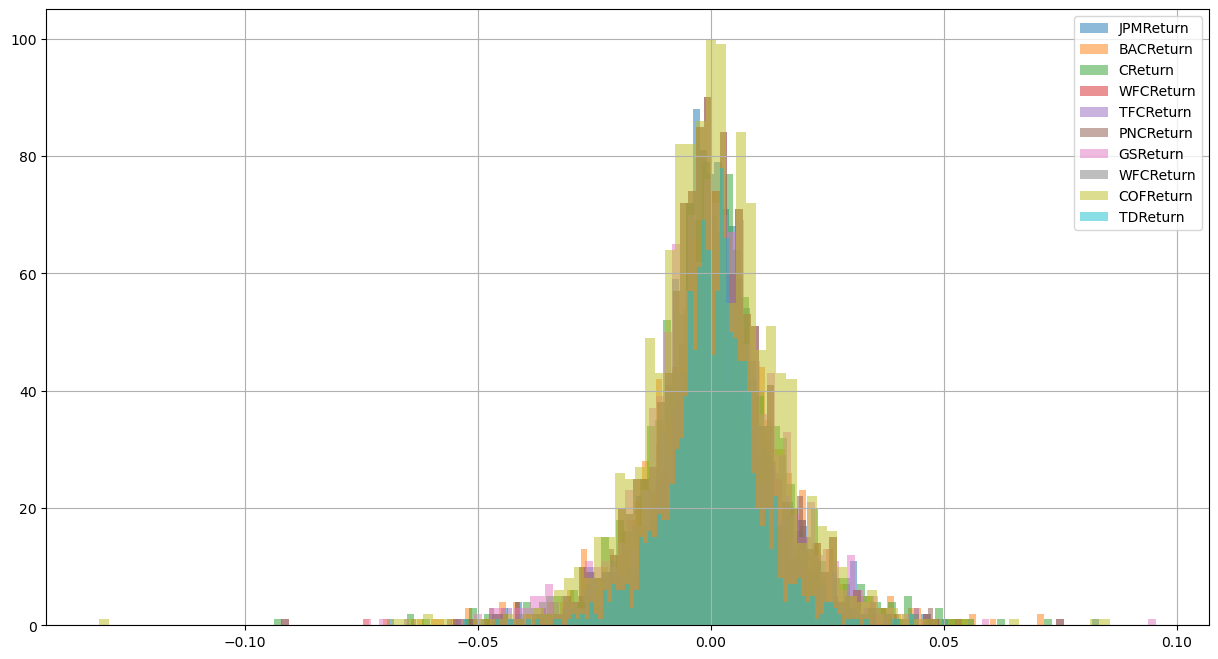

In [48]:
#Volatility of all the stock returns before Covid 
#It shows that the most volatile stock before Covid is Capital One(COF)

PreCovidReturns['JPMReturn'].hist(bins=100,label='JPMReturn',alpha=0.5,figsize = (15,8))
PreCovidReturns['BACReturn'].hist(bins=100,label='BACReturn',alpha=0.5,)
PreCovidReturns['CReturn'].hist(bins=100,label='CReturn',alpha=0.5,)
PreCovidReturns['WFCReturn'].hist(bins=100,label='WFCReturn',alpha=0.5,)
PreCovidReturns['TFCReturn'].hist(bins=100,label='TFCReturn',alpha=0.5,)
PreCovidReturns['PNCReturn'].hist(bins=100,label='PNCReturn',alpha=0.5,)
PreCovidReturns['GSReturn'].hist(bins=100,label='GSReturn',alpha=0.5,)
PreCovidReturns['WFCReturn'].hist(bins=100,label='WFCReturn',alpha=0.5,)
PreCovidReturns['COFReturn'].hist(bins=100,label='COFReturn',alpha=0.5,)
PreCovidReturns['TDReturn'].hist(bins=100,label='TDReturn',alpha=0.5,)
plt.legend()
plt.show()

## The Volatility Of The Stock Returns For Covid Period

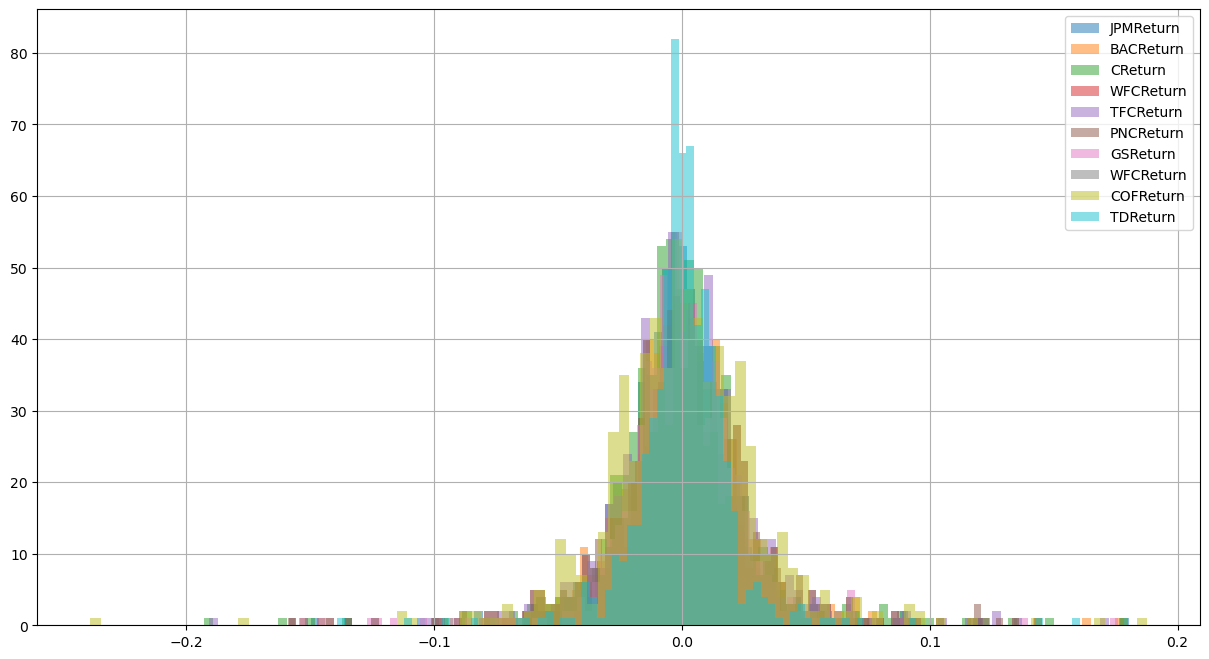

In [49]:
#Volatility of all the stock returns during Covid 
#It shows that the most volatile stock during Covid is Toronto-Dominion Bank(TD)

CovidReturns['JPMReturn'].hist(bins=100,label='JPMReturn',alpha=0.5,figsize = (15,8))
CovidReturns['BACReturn'].hist(bins=100,label='BACReturn',alpha=0.5,)
CovidReturns['CReturn'].hist(bins=100,label='CReturn',alpha=0.5,)
CovidReturns['WFCReturn'].hist(bins=100,label='WFCReturn',alpha=0.5,)
CovidReturns['TFCReturn'].hist(bins=100,label='TFCReturn',alpha=0.5,)
CovidReturns['PNCReturn'].hist(bins=100,label='PNCReturn',alpha=0.5,)
CovidReturns['GSReturn'].hist(bins=100,label='GSReturn',alpha=0.5,)
CovidReturns['WFCReturn'].hist(bins=100,label='WFCReturn',alpha=0.5,)
CovidReturns['COFReturn'].hist(bins=100,label='COFReturn',alpha=0.5,)
CovidReturns['TDReturn'].hist(bins=100,label='TDReturn',alpha=0.5,)
plt.legend()
plt.show()

## The Volatility Of The Stock Returns For Post-Covid Period

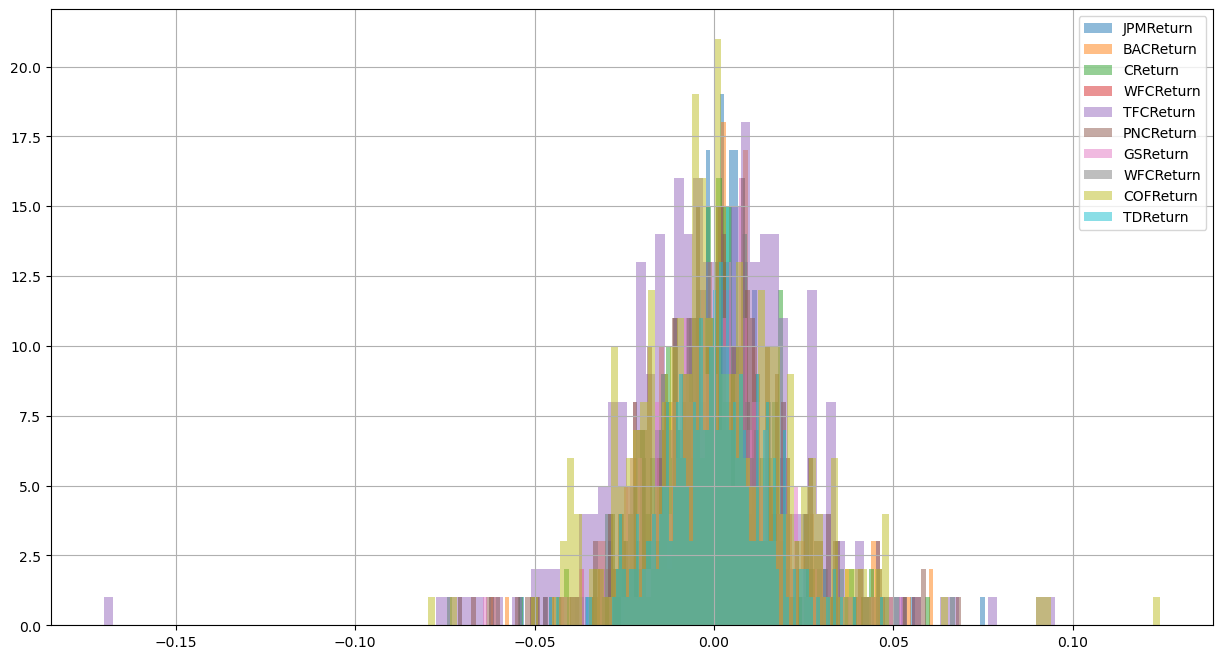

In [50]:
#Volatility of all the stock returns after Covid 
#It shows that the most volatile stock after Covid is Capital One 

PostCovidReturns['JPMReturn'].hist(bins=100,label='JPMReturn',alpha=0.5,figsize = (15,8))
PostCovidReturns['BACReturn'].hist(bins=100,label='BACReturn',alpha=0.5,)
PostCovidReturns['CReturn'].hist(bins=100,label='CReturn',alpha=0.5,)
PostCovidReturns['WFCReturn'].hist(bins=100,label='WFCReturn',alpha=0.5,)
PostCovidReturns['TFCReturn'].hist(bins=100,label='TFCReturn',alpha=0.5,)
PostCovidReturns['PNCReturn'].hist(bins=100,label='PNCReturn',alpha=0.5,)
PostCovidReturns['GSReturn'].hist(bins=100,label='GSReturn',alpha=0.5,)
PostCovidReturns['WFCReturn'].hist(bins=100,label='WFCReturn',alpha=0.5,)
PostCovidReturns['COFReturn'].hist(bins=100,label='COFReturn',alpha=0.5,)
PostCovidReturns['TDReturn'].hist(bins=100,label='TDReturn',alpha=0.5,)
plt.legend()
plt.show()

In [51]:
# To get the exact dates of the minimum/lowest return of all the stocks was during the Covid19 period 
# Our data shows that the lowest return for most bank stocks was 16th March,2020 and 
# this date was Dow Jones worst day since year 1987,it dropped about -12.93%.
stock_returns.idxmin()

JPMReturn   2020-03-16
BACReturn   2020-03-16
CReturn     2020-03-16
WFCReturn   2020-03-12
USBReturn   2020-03-09
TFCReturn   2020-03-16
PNCReturn   2020-03-16
GSReturn    2020-03-16
COFReturn   2020-03-16
TDReturn    2020-03-09
dtype: datetime64[ns]